In this notbook, we will explore how to add a spike function $\epsilon(A)$ to a linear neutron separation energy $S_n(Z,A)$. This linear $S_n$ plus a specified $\epsilon(A)$ can give us all of the possible nuetron separation energy distribution in an isotopic chain. With which, we can understand why the isotopic abundance patterns look what they do.

First, import nesassary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

We firstly define a simple linearly decreasing neutron separation energy $S_n(Z,A) = S_0 + S_1(A_0(Z)-A)$, where $A_0(Z)$ is the starting isotope in each isotopic chain. Since $Z$ is fixed in each isotopic chain, we will use $N$ (neutron number) instead of $A$ to do the calculation.

In [2]:
def sn_main(N, s_array):
    x = np.zeros(len(N))
    for i in range(len(s_array)):
        x += s_array[i] * np.power(N[0] - N, i)
    return x 

Now, we can define an $\epsilon(A)$. Firstly, let's consider a linear neutron separation energy. $S_n = -\mu_n'$. If so, the spike function will be the difference of the linear $S_n$ and constant $S_n$ and the abundance curve will be constant line. 

In [3]:
def epsilon_cst(N, s_array, mu_n):
    li = np.zeros(len(N))
    li += -mu_n - sn_main(N, s_array)
    return li

With the $S_n$ and spike function, we can calculte the isotopic abundances. By sovling the Saha equation, we know that the exponential part of the abundance is the sumation of $S_n$ and $\mu_n'$. Therefore, we need to know the integration of $\epsilon(A)$ over $A$. This can be done in this function below.  

In [4]:
def get_spike(N, epsilon):
    a = 0
    spike = []
    for i in range(len(N)):
        a += epsilon[i]
        spike.append(a)
    return spike

Now, we can calculate isotopic abundances with linear $S_n$ and linear $S_n$ plus $\epsilon(A)$. We can also see how those two lines are connected. I will use blue line to indicate the abundances calculated with linear $S_n$, while use red line to show the abundances computed with linear $S_n + \epsilon(A)$. For differenct $\epsilon(A)$, the normolized parameter is different. So except for the $T_9$ parameter, we use ymin to set the y limit; n to set how many line you would like to see after the spike and l to set the starting point of the spike you would like to see. 

In [5]:
def spike_y(s_array, epsilon, mu_n, N, T_9, spike, ymin, n, l): 
    
    fig = plt.figure(figsize=(8,6))  
    plt.subplot(211)
    plt.plot(N,sn_main(N, s_array), '.-', color = 'blue', label = r'linear $S_n$')
    plt.plot(N,sn_main(N, s_array) + epsilon, '-*', color = 'red', label = r'linear $S_n + \epsilon$')
    plt.xlim(np.min(N)-2,75)
    plt.ylabel('Energy [MeV]')
    plt.legend()
    
    plt.subplot(212)
    f0 = ((s_array[1]*11.609)/(2*T_9)*((s_array[0] + mu_n)/s_array[1]-1/2)**2)-((s_array[1]*11.609)/(2*T_9))*((N-N[0])-(s_array[0] + mu_n)/s_array[1]+1/2)**2

    for i in range(n):
        f1 = f0 + spike[i+l]*(11.609/T_9)
        f1 -=np.max(f0)
        F = math.e**(f1)
        plt.plot(N, F, '.', ls = 'dashed', label = r'after spike' +str(i+1))
        
    f2 = f0 + np.array(spike)*(11.609/T_9)
    f2 -=np.max(f0)
    f0 -=np.max(f0)
    
    L = math.e**(f0)
    E = math.e**(f2)
    plt.plot(N, L,'.', ls = 'dashed', label = r'linear $S_n$', color = 'blue')
    plt.plot(N, E,'-*', label = r'linear $S_n$ + $\epsilon$', color = 'red', zorder=10)    
    plt.yscale('log')
    plt.legend()
    plt.xlim(np.min(N)-2,75)
    plt.ylim(ymin,1.e5)
    plt.ylabel('Abundances')
    plt.xlabel('N neutron number')

With those functions, we can plot the figure by getting all of the needed parameters and the array of spike.

In [6]:
s_array = [20, 0.25]
delta = 1.5
shell = [(-1.5, 50), (-1.5, 82)]
T_9 = 2
mu_n = -16
N = np.arange(40,80)
plt.close()

Now let us run the spike_y function. The upper panel will show the $S_n$ vs. $N$, while the lower panel will show the connetion of abundances curve computed from $S_n$ and $S_n + \epsilon$.

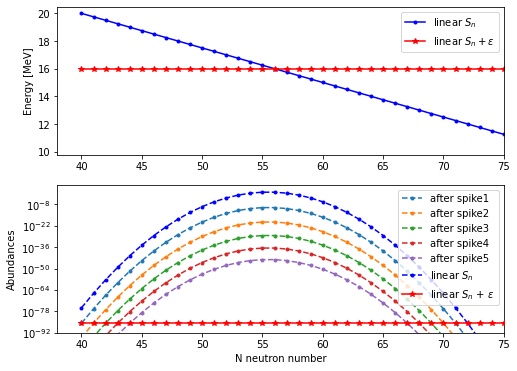

In [7]:
spike = get_spike(N, epsilon_cst(N, s_array, mu_n))
spike_y(s_array, epsilon_cst(N, s_array, mu_n), mu_n, N, T_9, spike, 1.e-92, 5, 0)

Except for a linear $S_n$, we can also define a spike function to show the pairing effect.

In [8]:
def epsilon_pair(N, delta):
    sp = []
    for i in range(len(N)):
        if (N[i] % 2) == 0:
            sp.append(delta)
        else:
            sp.append(-delta)
    return sp

Now, let us run the spike_y again.

[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79] [1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0, 1.5, 0.0]


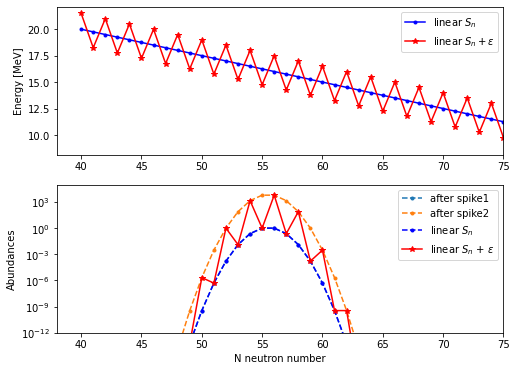

In [9]:
spike = get_spike(N, epsilon_pair(N, delta))
print(N, spike)
spike_y(s_array, epsilon_pair(N, delta), mu_n, N, T_9, spike, 1.e-12, 2, 1)

Similarly, we can define a function to show the shell effect.

In [10]:
def epsilon_shell(N, shell):
    sl = np.zeros(len(N))
    for i in range(len(shell)):
        sl += (shell[i][0] * np.heaviside(N - shell[i][1], 0))
    return sl

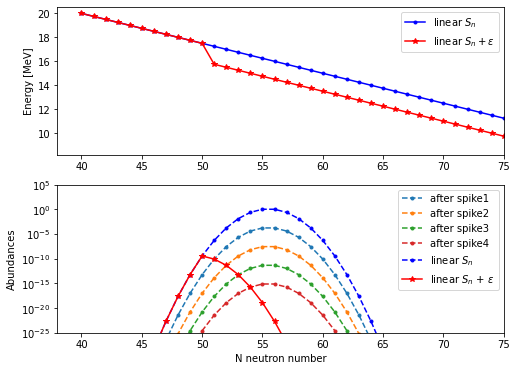

In [11]:
spike = get_spike(N, epsilon_shell(N, shell))
spike_y(s_array, epsilon_shell(N, shell), -16, N, T_9, spike, 1.e-25, 4, 11)